In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from GRIT import get_all_site_data, chromosomes

all_sites = get_all_site_data()

processing chromosome 1 ...
processing chromosome 2 ...
processing chromosome 3 ...
processing chromosome 4 ...
processing chromosome 5 ...
processing chromosome 6 ...
processing chromosome 7 ...
processing chromosome 8 ...
processing chromosome 9 ...
processing chromosome 10 ...
processing chromosome 11 ...
processing chromosome 12 ...
processing chromosome 13 ...
processing chromosome 14 ...
processing chromosome 15 ...
processing chromosome 16 ...
processing chromosome 17 ...
processing chromosome 18 ...
processing chromosome 19 ...
processing chromosome 20 ...
processing chromosome 21 ...
processing chromosome 22 ...
processing chromosome X ...
processing chromosome Y ...


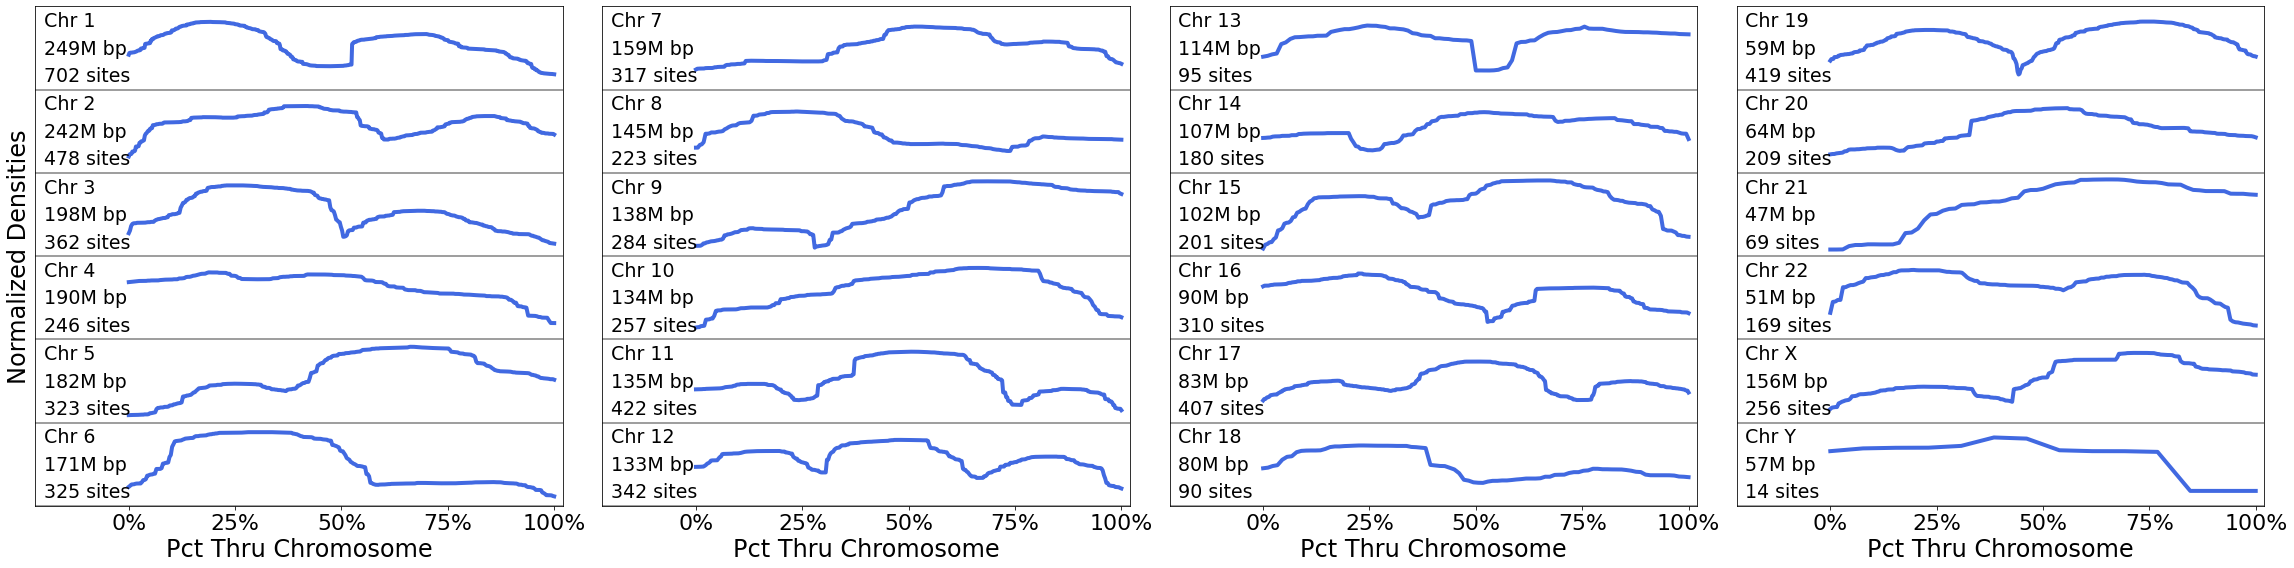

In [8]:
fig, axes = plt.subplots(1, 4, figsize=(32, 8))
axes[0].set_ylabel('Normalized Densities', fontsize=24)

for ax_i in range(4):
    axes[ax_i].set_xlim([-0.22,1.02])
    axes[ax_i].set_ylim([0, 6])
    axes[ax_i].hlines(y=list(range(6)), xmin=-0.22, xmax=1.02, colors='gray')
    axes[ax_i].set_xticks([0, 0.25, 0.5, 0.75, 1])
    axes[ax_i].set_xticklabels(['0%', '25%', '50%', '75%', '100%'], fontsize=22)
    axes[ax_i].set_yticks([])
    axes[ax_i].set_xlabel('Pct Thru Chromosome', fontsize=24)

for chr_i, c  in enumerate(chromosomes):
    ax_i = chr_i // 6
    row_i = chr_i % 6
    kernel = stats.gaussian_kde(all_sites[chr_i])
    density = kernel(all_sites[chr_i])
    density /= max(density)
    density -= 0.5 * min(density)
    density += 5 - row_i
    x = np.linspace(0, 1, len(density))
    axes[ax_i].plot(x, density, color='royalblue', linewidth=4)
    axes[ax_i].text(-0.2, 5.76-row_i, f'Chr {c}', fontsize=19)
    axes[ax_i].text(-0.2, 5.43-row_i, f'{round(all_sites[chr_i][-1] / 1e6)}M bp', fontsize=19)
    axes[ax_i].text(-0.2, 5.1-row_i, f'{len(all_sites[chr_i])} sites', fontsize=19)

plt.tight_layout()
plt.savefig('results/tag_sites_plot.png')
plt.show()
